In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeClassifier

### 2.7.1
Начнём с простого - создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.

﻿У дерева должны быть следующие параметры:
максимальная глубина - 5 уровней
минимальное число образцов в вершине для разделения - 5

In [6]:
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=5)

#### 2.7.2
Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

В ответе необходимо указать число с точностью 3 знака после запятой.

In [7]:
df =pd.read_csv('../data/train_data_tree.csv')

In [8]:
df.head(2)

,sex,exang,num
0,1,1,1
1,1,1,1


In [9]:
df.shape

(238, 3)

1. Создаем классификатор
2. Готовим данные
2. Обучаем
3. Рисуем дерево
4. Определяем IG. Либо вручную с картинки либо встроенными средствами(если они есть)

In [11]:
# Создаем классификатор
clf = DecisionTreeClassifier(criterion='entropy')

In [12]:
# Готовим данные
X = df.drop('num',axis=1)
y = df['num']

In [14]:
# Обучаем модель
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

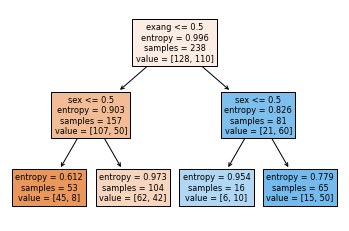

In [19]:
# Рисуем дерево
tree.plot_tree(clf,feature_names=list(X),filled=True);

In [29]:
En = ((157/238)*0.903) + ((81/238)*0.826)


In [30]:
print(round((0.996-En),3))

0.119


In [38]:
# Средствами sklearn
l_node = clf.tree_.children_left[0]# индекс корня левого поддерева
r_node = clf.tree_.children_right[0]# индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # Количество обьектов в левом дереве
n2 = clf.tree_.n_node_samples[r_node] # Количество обьектов в правом дереве

e1 = clf.tree_.impurity[l_node]  # Энтропия в левом поддереве
e2 = clf.tree_.impurity[r_node] # Энтропия в правом поддереве

E = clf.tree_.impurity[0] # Базовая энтропия
N = clf.tree_.n_node_samples[0]
IG = E - ((n1/N)*e1+(n2/N)*e2)

In [40]:
print(round(IG,3))

0.119


#### 2.7.5
Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [44]:
# Подготовка данных
iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [45]:
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [52]:
# Создаем и обучаем дерево
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# Предсказываем
predicted = dt.predict(X_test)

#### 2.7.9
Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Подготовка данных
iris = load_iris()
X = iris.data
y = iris.target

In [60]:
# Создадим пустой классификатор и списки с возможными параметрами дерева
dt = DecisionTreeClassifier()
params = {'max_depth':range(1,11),'min_samples_split':range(2,11),'min_samples_leaf':range(1,11)}

In [68]:
search = GridSearchCV(dt,param_grid=params)

In [69]:
search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 11),
                       

In [70]:
best_tree = search.estimator

In [71]:
best_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 2.7.10
Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.

Здесь можно посмотреть на сравнение этих поисков.

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Подготовка данных
dt = DecisionTreeClassifier()
params = {'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}

In [74]:
search = RandomizedSearchCV(dt,params)

In [75]:
search.fit(X,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [76]:
best_tree = search.best_estimator_

#### 2.7.11
Воспользуемся изученными приёмами и попредсказываем!

Даны 2 датасэта, к которым вы можете обращаться:

    train - размеченный с известными правильным ответами (хранятся в колонке y)
    test - набор, где нужно предсказать их
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [ ]:
# Подготовка данных. Используется уже загруженный датасет ирисы
X = train.drop('y',axis=1)
y = train['y']

dt = DecisionTreeClassifier()
params = {'max_depth':range(1,11),'min_samples_split':range(2,11),'min_samples_leaf':range(1,11)}

search = GridSearchCV(dt,param_grid=params)
search.fit(X,y)

best_tree = search.best_estimator_

predictions = best_tree.predict(test)

#### 2.7.12
При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.

В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [81]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y,predictions)